In [22]:
import pywt
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [23]:
# Load image
img = cv2.imread('test.png')

In [24]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2.imwrite("wvtbefore.png",gray)

True

In [25]:
x=cv2.imread("wvtbefore.png")

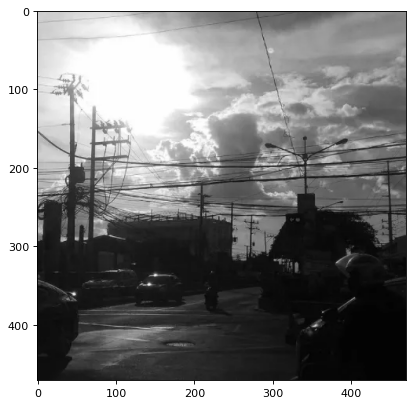

In [26]:
#plot the original image
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(x)
plt.show()

In [29]:
coeffs = pywt.dwt2(gray, 'haar')
LL, (LH, HL, HH) = coeffs

In [30]:
cv2.imwrite('wvtafter.png', LL)

True

In [39]:
# Load original image and transformed image
original_image = cv2.imread('wvtbefore.png')
transformed_image = cv2.imread('wvtafter.png')

In [42]:
# Resize transformed image to match the size of original image
transformed_image = cv2.resize(transformed_image, (original_image.shape[1], original_image.shape[0]))

In [43]:
# Convert both images to float32
original_image = original_image.astype(np.float32)
transformed_image = transformed_image.astype(np.float32)

In [44]:
# Calculate PSNR between original and reconstructed images
psnr = cv2.PSNR(original_image, transformed_image)

In [46]:
import cv2
import numpy as np

In [49]:
# Load the original image
original_img = cv2.imread('fftbefore.png')

In [50]:
# Perform wavelet transform on the original image
coeffs = pywt.dwt2(original_img, 'haar')

In [51]:
# Compress the image by setting the low-frequency coefficients to zero
compressed_coeffs = list(coeffs)
compressed_coeffs[0] *= 0
compressed_img = pywt.idwt2(compressed_coeffs, 'haar')

In [53]:
# Remove the additional dimension from the compressed image
compressed_img = compressed_img[:, :, 0:3]


In [54]:
# Calculate the PSNR value
mse = np.mean((original_img - compressed_img) ** 2)
if mse == 0:
    psnr = float('inf')
else:
    max_pixel_value = 255.0
    psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))

In [55]:
psnr

5.544391567890539